## Hierarchial methods

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import sklearn
import sklearn.metrics as sm

In [17]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

In [18]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
sns.set_style("whitegrid")

In [19]:
address = '../data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

X = cars[['mpg','disp','hp','wt']].values
y = cars.iloc[:, 9].values

### Using scipy to generate dendrograms

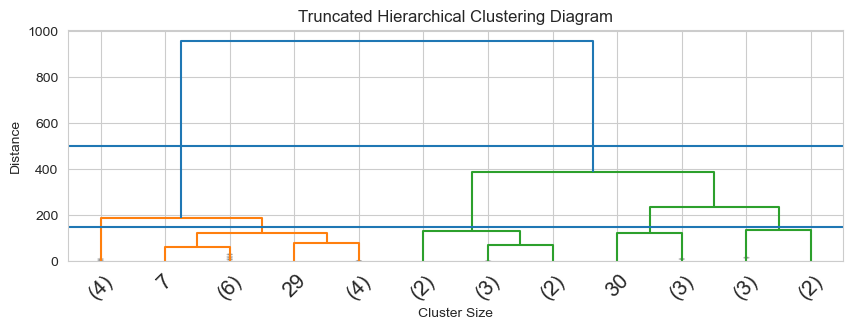

In [20]:
Z = linkage(X, 'ward')

dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title('Truncated Hierarchical Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

### Generating hierarchical clusters

In [21]:
k = 2

hclustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
hclustering.fit(X)

sm.accuracy_score(y, hclustering.labels_)

0.78125

In [22]:
hclustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='average')
hclustering.fit(X)

sm.accuracy_score(y, hclustering.labels_)

0.78125

In [23]:
hclustering = AgglomerativeClustering(n_clusters=k, metric='manhattan', linkage='average')
hclustering.fit(X)

sm.accuracy_score(y, hclustering.labels_)

0.71875